# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра. 

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [16]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

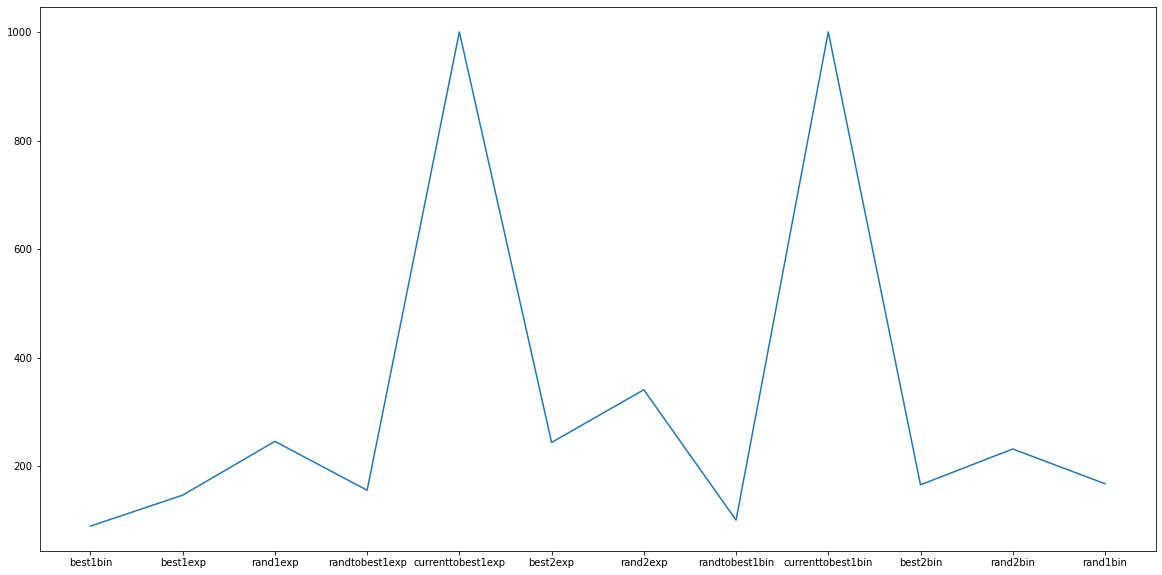

In [3]:
strategy = ['best1bin',
'best1exp',
'rand1exp',
'randtobest1exp',
'currenttobest1exp',
'best2exp',
'rand2exp',
'randtobest1bin',
'currenttobest1bin',
'best2bin',
'rand2bin',
'rand1bin']

res = {}

for s in strategy:
    res[s] = differential_evolution(ackley, bounds, strategy=s, seed=42).nit

plt.figure(figsize=(20, 10))
plt.plot(res.keys(), res.values())

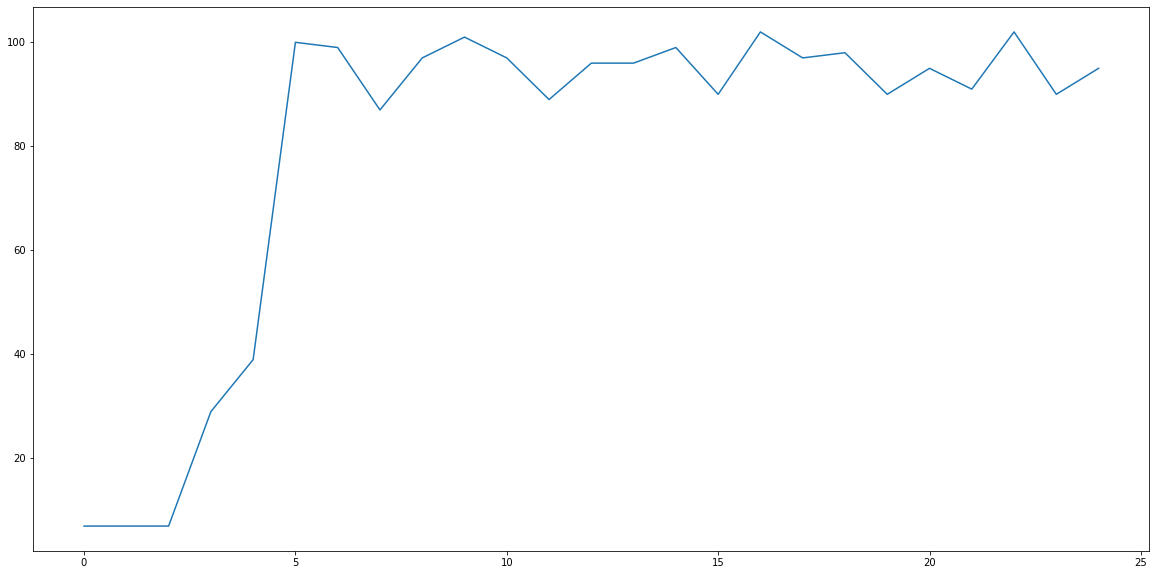

In [4]:
res = {}

for popsize in range(25):
    res[popsize] = differential_evolution(ackley, bounds, popsize=popsize, seed=42).nit

plt.figure(figsize=(20, 10))
plt.plot(res.keys(), res.values())

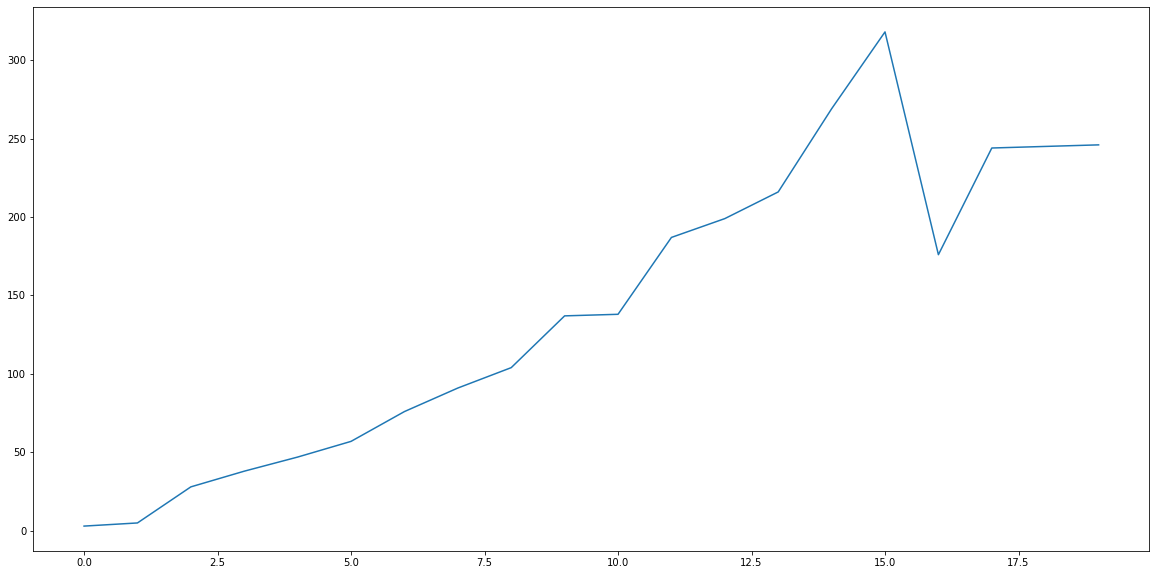

In [5]:
res = {}

for mutation in range(20):
    res[mutation] = differential_evolution(ackley, bounds, mutation=mutation/10, seed=42).nit

plt.figure(figsize=(20, 10))
plt.plot(res.keys(), res.values())

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [6]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([4.44089210e-16, 5.13604405e-05, 8.81584216e-05]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([0., 0.])

In [7]:
opt = {}

0, 0 
 8


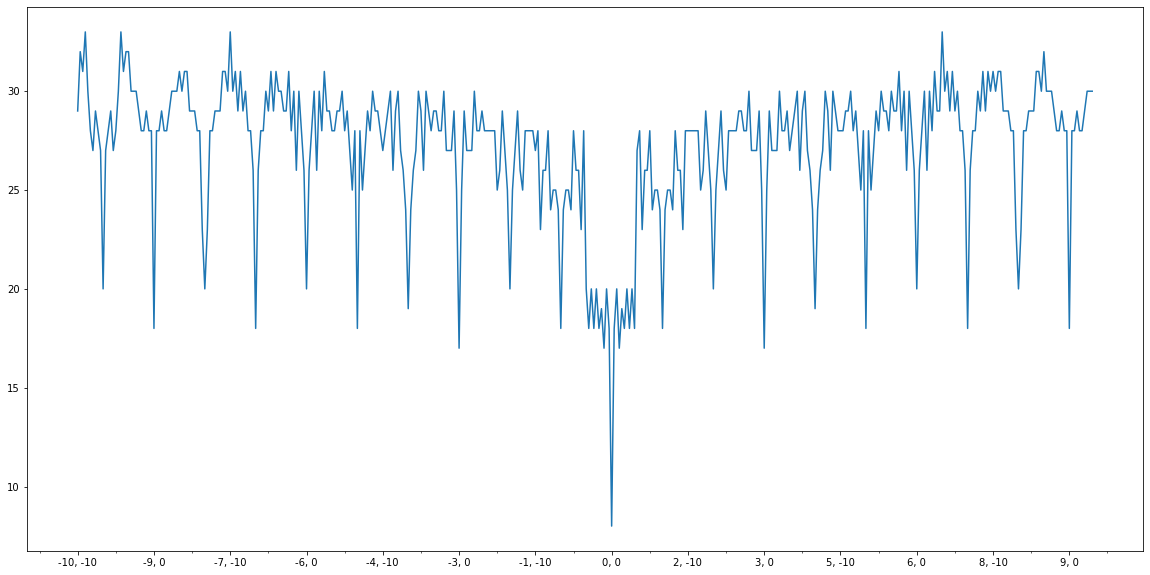

In [26]:
temp = {}
x0 = [0,0]

for x1 in range(-10, 10):
    for x2 in range(-10, 10):
        x0 = [x1,x2]
        temp[f'{x1}, {x2}'] = minimize(ackley, x0, method='Nelder-Mead').nit


fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(15))
ax.plot(temp.keys(), temp.values())

t_min = min(temp, key=temp.get)
print(t_min, '\n', temp[t_min])

COBYLA
dogleg
trust-ncg
trust-exact
trust-krylov
Для вышеперечисленных методов отсутствует атрибут 'nit'


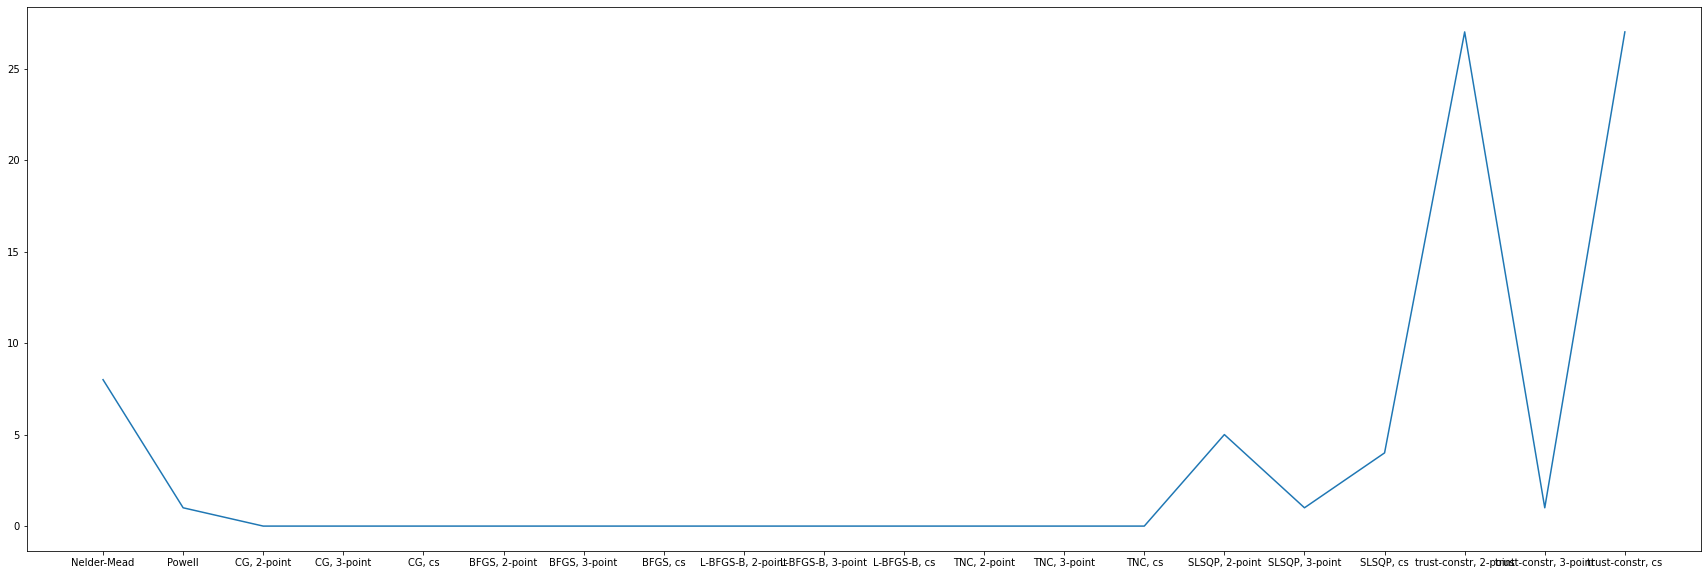

In [53]:
methods = ['Nelder-Mead',
'Powell',
'CG',
'BFGS',
'L-BFGS-B',
'TNC',
'COBYLA',
'SLSQP',
'trust-constr',
'dogleg',
'trust-ncg',
'trust-exact',
'trust-krylov']

jacobian_list = ['CG', 'BFGS', 'L-BFGS-B', 'TNC', 'SLSQP', 'dogleg', 'trust-ncg',
                 'trust-krylov', 'trust-exact', 'trust-constr']
res = {}
x0 = [0,0]
jac = None

for method in methods:
    if method in jacobian_list:
        for j in ['2-point', '3-point', 'cs']:
            jac = j
            try:
                res[f'{method}, {j}'] = minimize(ackley, x0, method=method, jac=jac).nit
            except:
                print(method)
                break
    else:
        try:
            res[method] = minimize(ackley, x0, method=method, jac=jac).nit
        except:
            print(method)
    jac = None
print("Для вышеперечисленных методов отсутствует атрибут 'nit'")

plt.figure(figsize=(30, 10))
plt.plot(res.keys(), res.values())

Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.
